In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pykalman import KalmanFilter

# Train with data

In [11]:
train = pd.read_csv('data.csv', names=['left', 'right'])

In [12]:
t = train[300:1000].reset_index()

In [13]:
t

,index,left,right
0,300,0.164934,0.329867
1,301,0.494801,0.329867
2,302,0.494801,0.659734
3,303,0.164934,0.164934
4,304,0.494801,0.329867
...,...,...,...
695,995,0.824668,0.824668
696,996,0.164934,0.164934
697,997,0.494801,0.494801
698,998,0.329867,0.329867


In [14]:
len(t)

700

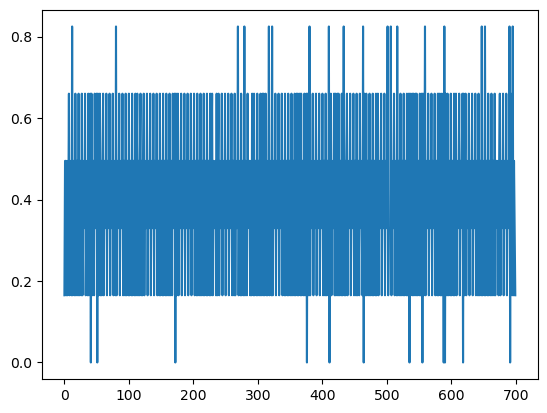

In [15]:
fig, axs = plt.subplots(1, 1)
axs.plot(t.left)
plt.show()

(array([ 12.,   0.,   0.,   0.,   0., 214.,   0.,   0.,   0.,   0.,   0.,
          0., 123.,   0.,   0.,   0.,   0., 190.,   0.,   0.,   0.,   0.,
          0.,   0., 142.,   0.,   0.,   0.,   0.,  19.]),
 array([0.        , 0.02748894, 0.05497787, 0.08246681, 0.10995574,
        0.13744468, 0.16493361, 0.19242255, 0.21991149, 0.24740042,
        0.27488936, 0.30237829, 0.32986723, 0.35735616, 0.3848451 ,
        0.41233404, 0.43982297, 0.46731191, 0.49480084, 0.52228978,
        0.54977871, 0.57726765, 0.60475659, 0.63224552, 0.65973446,
        0.68722339, 0.71471233, 0.74220126, 0.7696902 , 0.79717914,
        0.82466807]),
 <BarContainer object of 30 artists>)

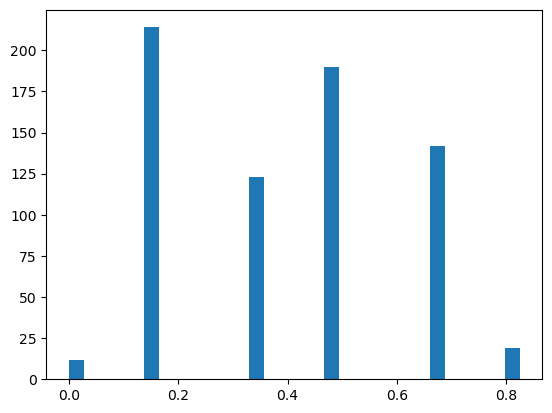

In [16]:
plt.hist(t.left, bins=30)

In [17]:
N_STATE = 10
initial_state_mean = np.zeros(N_STATE)
initial_state_covariance = np.ones((N_STATE, N_STATE))

In [18]:
kf = KalmanFilter(
    n_dim_obs=1,
    n_dim_state=N_STATE,
    initial_state_mean=initial_state_mean, 
    initial_state_covariance=initial_state_covariance)
kf = kf.em(t.left)

In [19]:
kf.observation_matrices

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [20]:
kf.observation_covariance

array([[0.0471223]])

In [21]:
kf.transition_matrices

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

In [22]:
kf.transition_covariance

array([[ 1.33013073e-02,  1.80230647e-11,  3.89540978e-08,
         9.94538578e-06,  3.08805560e-05, -2.52355254e-08,
        -2.52243506e-08,  3.56486252e-08,  1.90853409e-05,
         1.45117023e-05],
       [ 1.80230647e-11,  1.00000000e+00,  1.55536707e-07,
         3.95368142e-05,  1.23298305e-04, -1.00625204e-07,
        -1.00580494e-07, -5.78814504e-04,  7.61875600e-05,
         5.78149157e-05],
       [ 3.89540978e-08,  1.55536707e-07,  1.00000031e+00,
        -8.09341860e-01,  1.23453691e-04,  5.47633571e-08,
        -8.09381497e-01,  2.97645368e-07, -5.02613815e-04,
         6.36927066e-04],
       [ 9.94538578e-06,  3.95368142e-05,  8.09421245e-01,
         1.00007907e+00,  1.13151557e+03,  3.94360406e-05,
         3.98502198e-05, -5.39277836e-04,  1.13151553e+03,
         8.09479319e-01],
       [ 3.08805560e-05,  1.23298305e-04,  1.23453691e-04,
        -1.13151525e+03,  1.00024660e+00,  1.23197532e-04,
        -4.55759185e-04, -8.09258112e-01,  1.99484982e-04,
        -1.

In [23]:
np.save('observation_matrices', kf.observation_matrices)
np.save('observation_covariance', kf.observation_covariance)
np.save('transition_matrices', kf.transition_matrices)
np.save('transition_covariance', kf.transition_covariance)

# Prediction with test data

In [24]:
observation_matrices = np.load('observation_matrices.npy')
observation_covariance = np.load('observation_covariance.npy')
transition_matrices = np.load('transition_matrices.npy')
transition_covariance = np.load('transition_covariance.npy')

In [25]:
kf2 = KalmanFilter(
    n_dim_obs=1,
    n_dim_state=N_STATE,
    initial_state_mean=initial_state_mean, 
    initial_state_covariance=initial_state_covariance,
    observation_matrices=observation_matrices,
    observation_covariance=observation_covariance,
    transition_matrices=transition_matrices,
    transition_covariance=transition_covariance)

In [26]:
test = pd.read_csv('data2.csv', names=['left', 'right'])

In [27]:
pred = np.zeros(len(test))
current_state_mean = initial_state_mean
current_state_covariance = initial_state_covariance
for i, obs in enumerate(test.left):
    current_state_mean, current_state_covariance = kf2.filter_update(
        current_state_mean, 
        current_state_covariance, 
        observation=obs)
    pred[i] = kf2.observation_matrices.dot(current_state_mean)

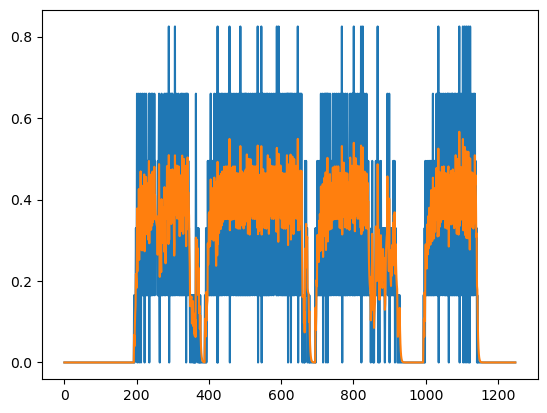

In [28]:
fig, axs = plt.subplots(1, 1)
axs.plot(test.left)
axs.plot(pred)
plt.show()

In [29]:
pred = np.zeros(len(test))
current_state_mean = initial_state_mean
current_state_covariance = initial_state_covariance
for i, obs in enumerate(test.right):
    current_state_mean, current_state_covariance = kf2.filter_update(
        current_state_mean, 
        current_state_covariance, 
        observation=obs)
    pred[i] = kf2.observation_matrices.dot(current_state_mean)

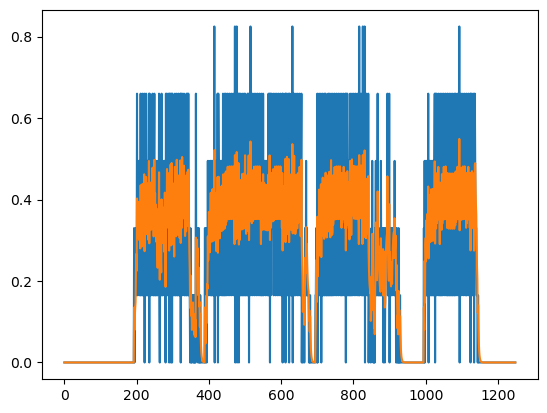

In [30]:
fig, axs = plt.subplots(1, 1)
axs.plot(test.right)
axs.plot(pred)
plt.show()